Stage 1 :  Library Installation and Imports

In [ ]:
from IPython import get_ipython #Ipython Environment Interaction
from IPython.display import display
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #Natural Language Toolkit
import re
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer   # for text to numerical based conversion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the training dataset
train_df = pd.read_csv('twitter_training.csv', header=None)
train_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Stage 2 : Data Filtering and Text Cleaning

In [ ]:
# Filter relevant sentiments
train_df = train_df[train_df['Sentiment'].isin(['Positive', 'Negative', 'Neutral','Irrelevant'])]   #consider rows of sentiment

# Define text cleaning function
stop_words = set(stopwords.words('english'))   #set of stopwords in english

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    text = re.sub(rf"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)  #remove numbers
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

# Apply cleaning
train_df['Clean_Tweet'] = train_df['Tweet'].apply(clean_text)  #Apply clean to Tweet Column and save in Clean_Tweet Column

# Display cleaned data
train_df[['Tweet', 'Clean_Tweet']].head()  # to display both columns

,Tweet,Clean_Tweet
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


Stage 3 : Sentiment Distribution Visualization

<ipython-input-5-452111be1b59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Sentiment', palette='coolwarm')  #Bar plot using Cool-Warm colour Palette


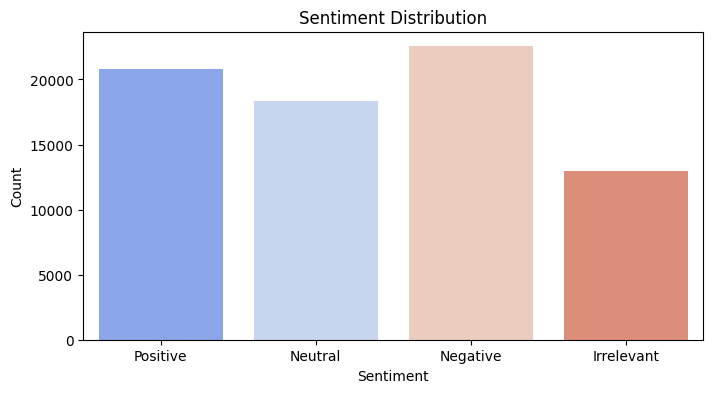

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8, 4))    #Figure size to 8 inches Wide and 4 inches Tall
sns.countplot(data=train_df, x='Sentiment', palette='coolwarm')  #Bar plot using Cool-Warm colour Palette
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Stage 4 : Text Vectorization and Model Training

In [ ]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_df['Clean_Tweet'])   #Clean_Tweet to TF-IDF Vector Form
y = train_df['Sentiment']   #Target Vriable

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)  #Trains the Model of Training Data

LogisticRegression(max_iter=200)

Stage 5 : Model Evaluation on Validation Data

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.66      0.50      0.57      2592
    Negative       0.72      0.76      0.74      4519
     Neutral       0.60      0.64      0.62      3596
    Positive       0.69      0.72      0.71      4230

    accuracy                           0.67     14937
   macro avg       0.67      0.65      0.66     14937
weighted avg       0.67      0.67      0.67     14937



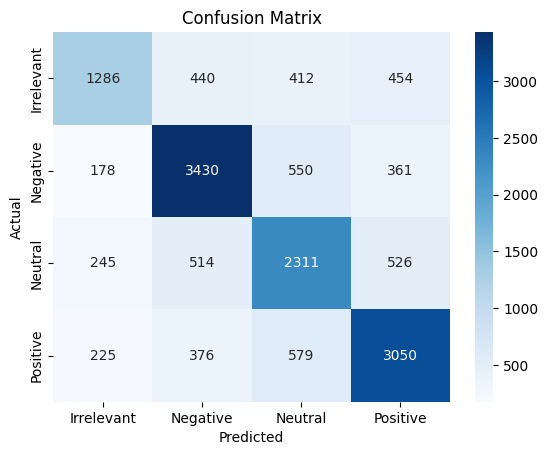

In [ ]:
# Predict on validation set
y_pred = model.predict(X_val) #Uses Trained MOdel to predict sentiments on validation data

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))  #Displays Precision recall f1-score support for sentiments

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)   #Creates for comparing Actual vs Predicted labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)   #Confusion matrix plot using Heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Stage 6 : Loading and Preparing Test Data for Prediction

In [ ]:
# Load the testing dataset
test_df = pd.read_csv('twitter_validation.csv', header=None)
test_df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

# Clean test data
test_df['Clean_Tweet'] = test_df['Tweet'].apply(clean_text)

# Vectorize test data
X_test = vectorizer.transform(test_df['Clean_Tweet'])
y_test = test_df['Sentiment']

# Predict on test data
y_test_pred = model.predict(X_test)

# Classification report
print("Test Data Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Data Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.74      0.68      0.71       172
    Negative       0.73      0.85      0.79       266
     Neutral       0.84      0.71      0.77       285
    Positive       0.80      0.84      0.82       277

    accuracy                           0.78      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.78      0.78      1000



Stage 7 : Sentiment Prediction Function for User Input

In [ ]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return prediction

# Example usage
user_input = "I Love to Dance"
print(f"Sentiment: {predict_sentiment(user_input)}")

Sentiment: Positive


Stage 8 : Generating Word Clouds for Each Sentiment

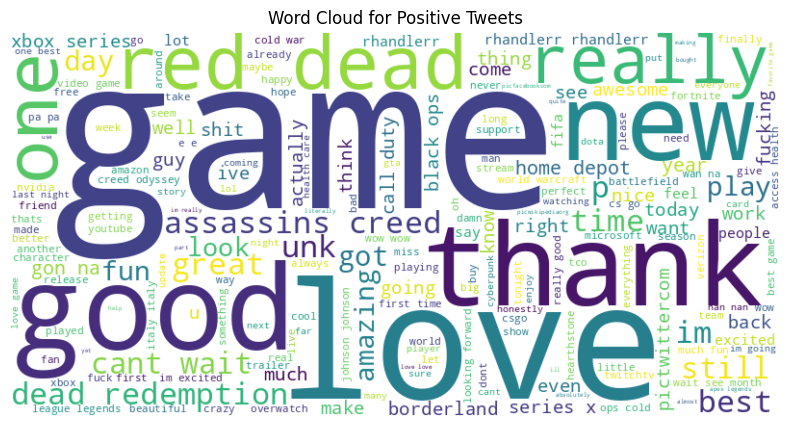

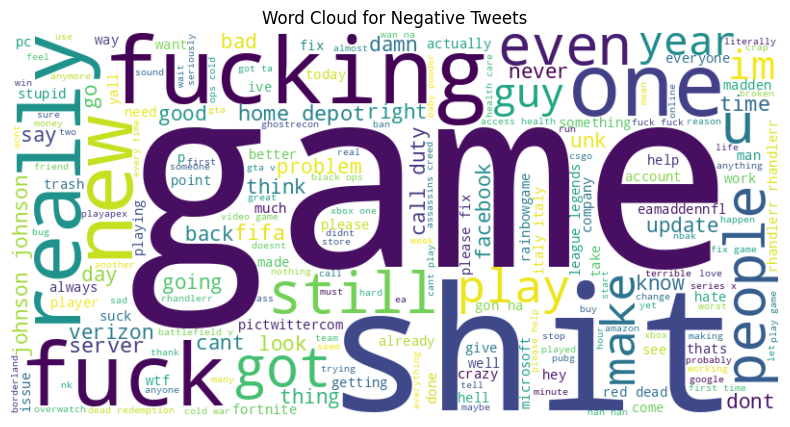

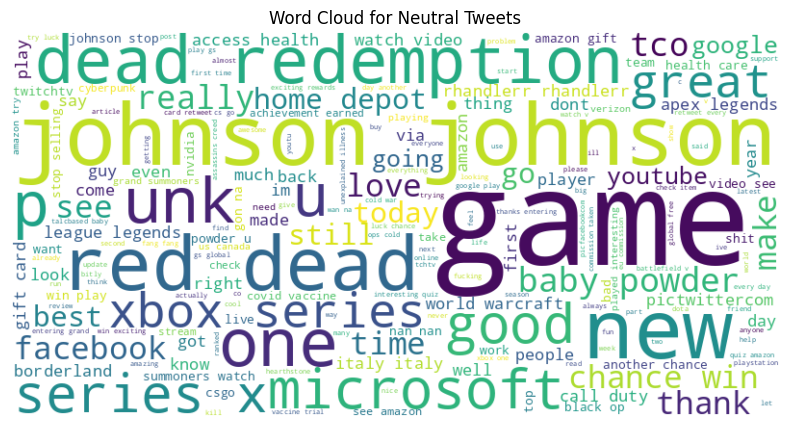

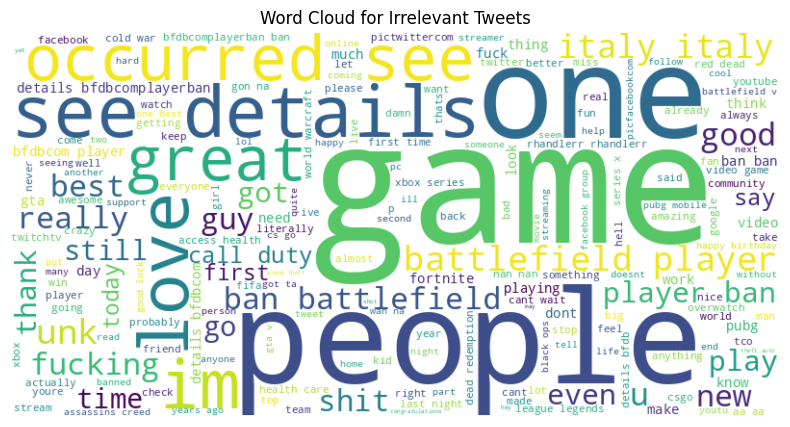

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral','Irrelevant']:
    text = " ".join(train_df[train_df['Sentiment'] == sentiment]['Clean_Tweet'])  #Joins all cleaned Tweets of Current sentiments into single text string
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)  #Word Could imaghe creationfron joined text, with bg color
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  #displays image with smooth rendering
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')  #Hides x & y axis
    plt.show()

Stage Extra 1 : Sentiment Analysis on Dataset with Interactive User Input

In [ ]:
!pip install transformers torch pandas tabulate

import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification   #Loading Pre-Trained Sentimental Model
from scipy.special import softmax  #Modewl outputs to Probabilities
from tabulate import tabulate

# Load training and testing data
train_df = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Game', 'Sentiment', 'Text'])
test_df = pd.read_csv('twitter_validation.csv', header=None, names=['ID', 'Game', 'Sentiment', 'Text'])

print(f"Training data: {len(train_df)} samples")
print(f"Testing data: {len(test_df)} samples")

# Load model
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'  #Model to Load
model = AutoModelForSequenceClassification.from_pretrained(model_name)  #Load Model
tokenizer = AutoTokenizer.from_pretrained(model_name)  #Loads tokenizer for model

# Analyze sentiment function
def analyze_sentiment(text):
    encoded = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    output = model(**encoded)  #Pass input through Model
    scores = softmax(output[0][0].detach().numpy())  #To get Probability Scores
    labels = ['Negative', 'Neutral', 'Positive']
    predicted_idx = np.argmax(scores)   #To take Highest Confidence Score
    return labels[predicted_idx], round(scores[predicted_idx], 4)  #Labels and Rounding Scores

# Predict on test data
results = test_df['Text'].apply(analyze_sentiment)  #Applies sentimental analysis to each cleaned tweet
test_df['Predicted_Sentiment'] = results.apply(lambda x: x[0]) #Extracts Sentiment Label
test_df['Confidence'] = results.apply(lambda x: x[1]) #Extracts Confidence Score

# Display first 10 results in table format
display_df = test_df[['Text', 'Sentiment', 'Predicted_Sentiment', 'Confidence']].head(10)
display_df['Text'] = display_df['Text'].str[:50] + '...'  #Truncate Long text for Display

print("\nFirst 10 Test Results:")
print(tabulate(display_df, headers='keys', tablefmt='grid', showindex=False))

# Save results
test_df.to_csv('test_results.csv', index=False)
print(f"\nResults saved to test_results.csv")

# Interactive sentiment prediction
print("\n" + "="*50)
print("INTERACTIVE SENTIMENT ANALYSIS")
print("="*50)

while True:
    user_input = input("\nEnter a quote (or 'quit' to exit): ")

    if user_input.lower() == 'quit':
        print("Goodbye!")
        break

    if user_input.strip():
        predicted_sentiment, confidence = analyze_sentiment(user_input)
        print(f"Text: {user_input}")
        print(f"Predicted Sentiment: {predicted_sentiment}")
        print(f"Confidence: {confidence}")
    else:
        print("Irrelevant")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 845.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]


First 10 Test Results:
+-------------------------------------------------------+-------------+-----------------------+--------------+
| Text                                                  | Sentiment   | Predicted_Sentiment   |   Confidence |
+=======================================================+=============+=======================+==============+
| I mentioned on Facebook that I was struggling for ... | Irrelevant  | Negative              |       0.7869 |
+-------------------------------------------------------+-------------+-----------------------+--------------+
| BBC News - Amazon boss Jeff Bezos rejects claims c... | Neutral     | Neutral               |       0.515  |
+-------------------------------------------------------+-------------+-----------------------+--------------+
| @Microsoft Why do I pay for WORD when it functions... | Negative    | Negative              |       0.9677 |
+-------------------------------------------------------+-------------+-----------------